# 6.4: WHR Machine Learning: Regression Analysis

### This script contains the following points:

#### 01. Import libraries & Data
#### 02. Data Cleaning & Consistency Checks
#### 03. Prep data for regression analysis
#### 04. Regression Analysis

#### Set 1 Null Hypothesis: "There is no significant difference in the contributions of variables to the Happiness Score."
#### Alternative Hypothesis: "Happiness Score is influenced by the combined contributions of multiple variables, but the extent and direction of each variable's contribution may vary."

# 01 Import Libraries  & Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
#create data path
path = r'C:\Users\fa_an\OneDrive\CareerFoundry\Tasks\Data Analytics Immersion\Tasks 6.1-6.7'

In [5]:
#df = WHR_all
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_all.pkl'))

In [6]:
#set to see all columns in display
pd.set_option('display.max_columns', None)

# 02 Data Cleaning & Consistency Checks

## Data Cleaning

In [7]:
df.columns

Index(['Country', 'Year', 'Region', 'Happiness Rank', 'Happiness Score', 'GDP',
       'Social Support', 'Life Expectancy', 'Freedom', 'Generosity',
       'Corruption', 'Dystopia + Residual'],
      dtype='object')

In [8]:
df.shape

(1505, 12)

## Rename columns

In [9]:
# Rename the columns? Not needed for this exercise.

## Check for Missing values

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Country                0
Year                   0
Region                 0
Happiness Rank         0
Happiness Score        0
GDP                    0
Social Support         0
Life Expectancy        0
Freedom                0
Generosity             0
Corruption             0
Dystopia + Residual    0
dtype: int64

#### No missing values!

## Check for Duplicates

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(1505,)

#### No duplicates!

## Check for Extreme Values

C:\Users\fa_an\AppData\Local\Temp\ipykernel_42352\1793342858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Happiness Score'], bins=25) # Shows extreme values


<Axes: xlabel='Happiness Score', ylabel='Density'>

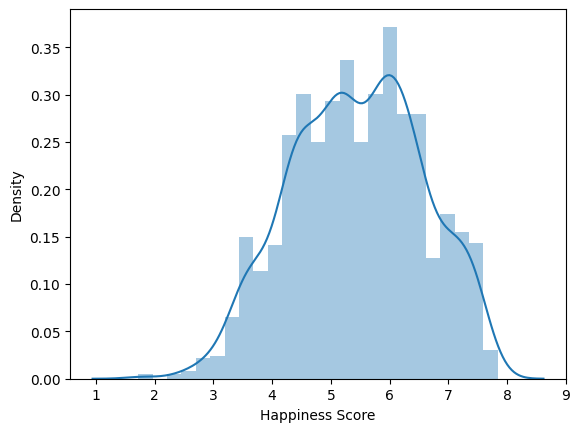

In [15]:
sns.distplot(df['Happiness Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed....

#### No extreme values.

## Check the mean, median, & max

In [16]:
# Check the mean
df['Happiness Score'].mean()

5.448822591362125

In [17]:
# Check the median
df['Happiness Score'].median()

5.472

In [18]:
# Check the max
df['Happiness Score'].max()

7.842

# 03 Data prep for regression analysis

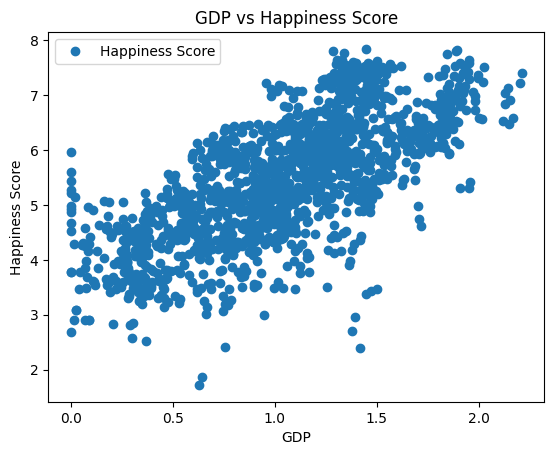

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'GDP', y='Happiness Score',style='o')
plt.title('GDP vs Happiness Score')  
plt.xlabel('GDP')  
plt.ylabel('Happiness Score')  
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['GDP'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04 Regression Analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

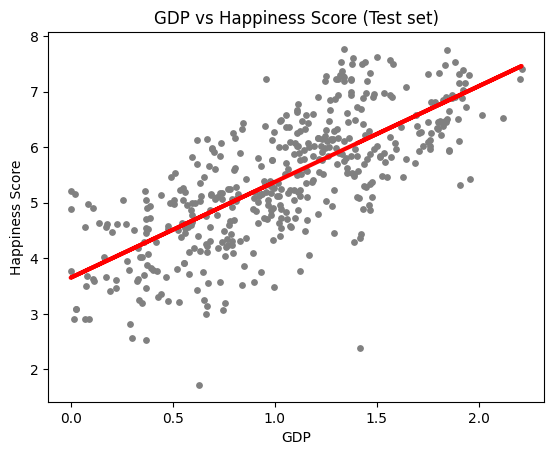

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP vs Happiness Score (Test set)')
plot_test.xlabel('GDP')
plot_test.ylabel('Happiness Score')
plot_test.show()

#### Based on the lesson, and the examples given. My data clearly shows that it doesn't fit the regression model well. The relationship between the predictor variable, GDP and Happiness Score may not be strictly linear. Thus, not capturing a true and accurate relationship.

#### However, handling train and test on all the variables may prove useful to see if any of them fair better at all.

#### The r2 score is fairly high at 0.526 or 52.6%. The slope however is at least positve, which indicates a positive relationship (as X rises, so does y).

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.72506654]]
Mean squared error:  0.6240510441902644
R2 score:  0.5264556942347097


In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.578,6.081082
1,5.277,6.150085
2,4.556,4.638927
3,6.269,5.366905
4,7.378,5.943077
5,5.048,5.320328
6,5.253,4.978765
7,5.523,5.786096
8,4.558,3.950625
9,7.494,6.031055


#### The r2 score of the training model was 0.494 compared to the test at 0.526. At least this indicates that the model is NOT overfitted at least since the scores are not far apart. Looking at the Actual vs Predicted Happiness Scores shows how far apart the results are. In some cases more than others. It could be worse, but it could also be ALOT better.

#### But the fact that the r2 score is lower in the training model suggests that the model isn't generalizing well to new data. This could be due to several reasons:
#### Not Enough data, model complexity (based on the amount of training data). Other factors that could impact, but not based on my processes so far is possible imputation of missing values. I did not do this to avoid that type of bias into the analysis. Also, sampling bias, but since this comes from a credible source, I am pretty sure that's not the case.

##### Comparing how the regression fits the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.72506654]]
Mean squared error:  0.625484313216934
R2 score:  0.49392544434171837


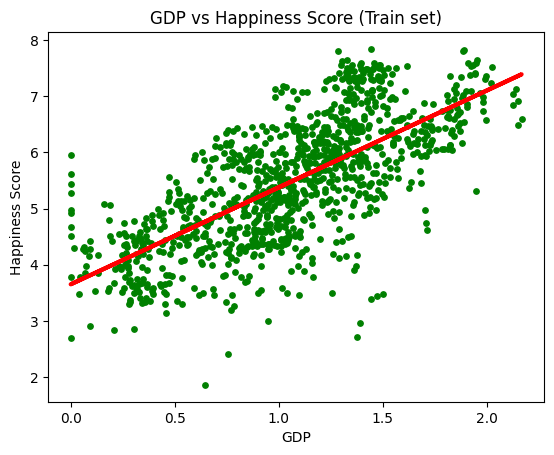

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP vs Happiness Score (Train set)')
plot_test.xlabel('GDP')
plot_test.ylabel('Happiness Score')
plot_test.show()

#### However, I will continue looking at the other independent variables on my own to see if they fit the regression model better. My guess is that there won't be much difference. But I am interested to see how it goes on the two lowest correlated variables of Generosity and Corruption. I have a feeling that the data will do much better by conducting a cluster analysis though. 

#### Also, I would have liked to do the bonus, but am stumped on how I would remove any further outliers at this point based on the histogram and scatterplot. Would I use IQR, find the lower and upper bounds and consider those outliers? Or I suppose look at a box and whisker chart. As an example, Happiness Scores that are above 6 or 6.5 and below 3 or 3.5? And by doing that I possibly introduce bias, because I'm making the dataset or sample size smaller, which could have a domino effect on representation, assumptions of the data based on the new regression model, possible overfitting, correct?